# Scraping Team Seas Data for analysis

In [26]:
import requests
import pandas
from bs4 import BeautifulSoup
from datetime import datetime
import matplotlib.pyplot as plt
import locale

In [27]:
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' ) 
headers = {"User-Agent": "Mozilla/5.0"}
# r = requests.get("https://teamseas.org/all-donors/", headers=headers)
r = requests.get("https://tscache.com/lb_recent.json")
# soup = BeautifulSoup(r.content, "html.parser")
donations = r.json()

In [28]:
donations.keys()

dict_keys(['recent', 'teams', 'most', 'config', 'teams_alpha', 'teams_most_donations'])

In [53]:
len(donations["recent"])

120

In [30]:
df_li = []
for recents in donations["recent"]:
    d = {}
    d["name"] = recents["name"]
    if recents["team_name"]:
        d["team_name"] = recents["team_name"]
    else:
        d["team_name"] = "Anonymous"
    d["created"] = datetime.strptime(datetime.utcfromtimestamp(int(recents["created_at"])).strftime('%Y-%m-%d %H:%M:%S'), '%Y-%m-%d %H:%M:%S')
    d["amount"] = locale.atoi(recents["pounds"])
    df_li.append(d)
df_li

[{'name': 'cuboids',
  'team_name': 'Anonymous',
  'created': datetime.datetime(2021, 12, 2, 18, 29, 19),
  'amount': 2},
 {'name': 'ips',
  'team_name': 'Anonymous',
  'created': datetime.datetime(2021, 12, 2, 18, 29, 16),
  'amount': 10},
 {'name': 'Bretondudgeon',
  'team_name': 'Anonymous',
  'created': datetime.datetime(2021, 12, 2, 18, 28, 47),
  'amount': 6},
 {'name': 'White Jesus*',
  'team_name': '**********',
  'created': datetime.datetime(2021, 12, 2, 18, 27, 58),
  'amount': 1},
 {'name': 'Anonymous',
  'team_name': 'Anonymous',
  'created': datetime.datetime(2021, 12, 2, 18, 26, 34),
  'amount': 5},
 {'name': 'Taliesin Driscoll',
  'team_name': 'Anonymous',
  'created': datetime.datetime(2021, 12, 2, 18, 26, 4),
  'amount': 75},
 {'name': 'Sam',
  'team_name': 'Anonymous',
  'created': datetime.datetime(2021, 12, 2, 18, 24, 40),
  'amount': 20},
 {'name': 'James Everard',
  'team_name': 'Anonymous',
  'created': datetime.datetime(2021, 12, 2, 18, 24, 19),
  'amount': 15},

In [31]:
df = pandas.DataFrame(df_li)
df["created"][0].strftime("%Y-%m-%d %H:%M:%S")

'2021-12-02 18:29:19'

## Plot of Donations vs Time

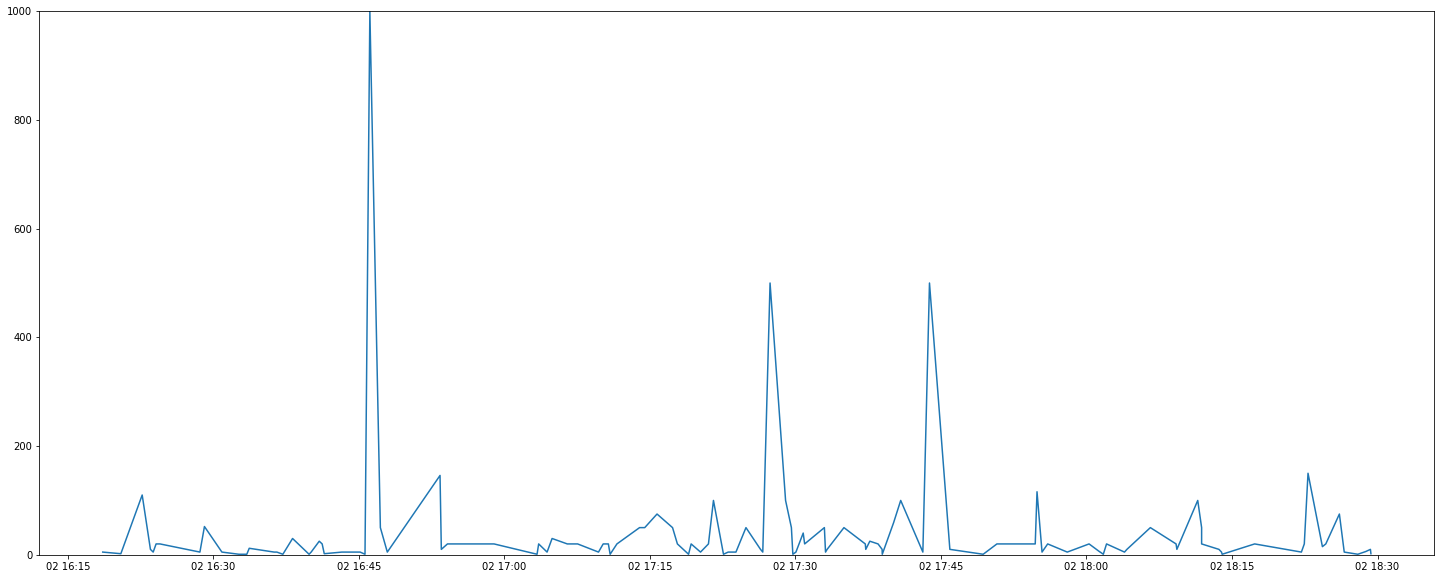

In [32]:
plt.figure(figsize=(25, 10))
# plt.yticks(range(min(df["amount"]), max(df["amount"])))
plt.ylim(0, df["amount"].max())
plt.plot(df["created"], df["amount"])

## Grouping according to teams

In [33]:
grouped_data = df.groupby(df["team_name"])["amount"].sum()
grouped_data

team_name
#KindlyWizards                31
**********                     1
5                              1
Alpha AF                      20
Anonymous                   3631
Aqua Fox                     100
Bearcat                       20
Charlie Brown Jr.              5
Fittime                        5
Harringtons                    5
Invalid Entry                 59
Lil Monki                    110
MalteseGoats                 100
Mammothdude                  120
Mason's Bar Mitzvah          100
Mikkel                        12
Mr. Beast                      5
MrBeast                       26
Ocean                         20
Power TakeOff                 50
Rollade                       20
Silly Sharks - Hard2fgur       5
Snowreyhs                      5
Team Doog!                     5
Team Simoni                   20
Team seas! ?                   5
Team whatever                 20
WATL WATL                     20
Wright Byrd                    5
Young Enterprise             146


In [34]:
teams_df = pandas.DataFrame({"team_name": grouped_data.index, "total_donated": grouped_data.values})
teams_df

,team_name,total_donated
0,#KindlyWizards,31
1,**********,1
2,5,1
3,Alpha AF,20
4,Anonymous,3631
5,Aqua Fox,100
6,Bearcat,20
7,Charlie Brown Jr.,5
8,Fittime,5
9,Harringtons,5


In [35]:
teams_df.sort_values(by=["total_donated"], ascending=False, inplace=True)

([<matplotlib.patches.Wedge at 0x25f59732ca0>,
 [Text(-0.8227269493641434, 0.7301509205568192, 'Anonymous'),
  Text(0.23599937303899424, -1.0743855434271263, 'Young Enterprise'),
  Text(0.4214589966123577, -1.016057239615222, 'Mammothdude'),
  Text(0.5714065650506251, -0.9399439012074315, 'Lil Monki'),
  Text(0.6967360957450766, -0.8512102048765087, 'Aqua Fox'),
  Text(0.8035069201717455, -0.751250044416715, "Mason's Bar Mitzvah"),
  Text(0.8960722451867402, -0.6380082533995894, 'MalteseGoats'),
  Text(0.9584286772010817, -0.539828186295033, 'Invalid Entry'),
  Text(0.9950229755958379, -0.4689661800560939, 'bearkat'),
  Text(1.023999381979151, -0.4017776321627634, 'Power TakeOff'),
  Text(1.0441541762600788, -0.3460376514176407, '#KindlyWizards'),
  Text(1.0565229744306344, -0.306201248364936, 'MrBeast'),
  Text(1.0653978292470172, -0.2737288173279236, 'Bearcat'),
  Text(1.0723043021900798, -0.24528245657740416, 'WATL WATL'),
  Text(1.0784513933235242, -0.21666239230320872, 'Team whate

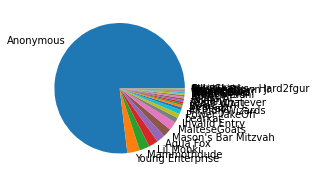

In [36]:
plt.figure(figsize=(25, 3))
plt.pie(teams_df["total_donated"], labels=teams_df["team_name"])

## Hourly Average

In [37]:
df["hour"] = df["created"].dt.strftime("%H")
df

,name,team_name,created,amount,hour
0,cuboids,Anonymous,2021-12-02 18:29:19,2,18
1,ips,Anonymous,2021-12-02 18:29:16,10,18
2,Bretondudgeon,Anonymous,2021-12-02 18:28:47,6,18
3,White Jesus*,**********,2021-12-02 18:27:58,1,18
4,Anonymous,Anonymous,2021-12-02 18:26:34,5,18
...,...,...,...,...,...
115,Anonymous,Anonymous,2021-12-02 16:23:48,5,16
116,Anonymous,Anonymous,2021-12-02 16:23:31,10,16
117,Lil Monki,Lil Monki,2021-12-02 16:22:40,110,16
118,SHJenkins,Anonymous,2021-12-02 16:20:28,2,16


In [38]:
hourly_grp = df.groupby(df["hour"])["amount"].sum()
hourly_grp

hour
16    1649
17    2412
18     661
Name: amount, dtype: int64

In [39]:
hourly_df = pandas.DataFrame({"hour": hourly_grp.index, "total_donation": hourly_grp.values })
hourly_df

,hour,total_donation
0,16,1649
1,17,2412
2,18,661


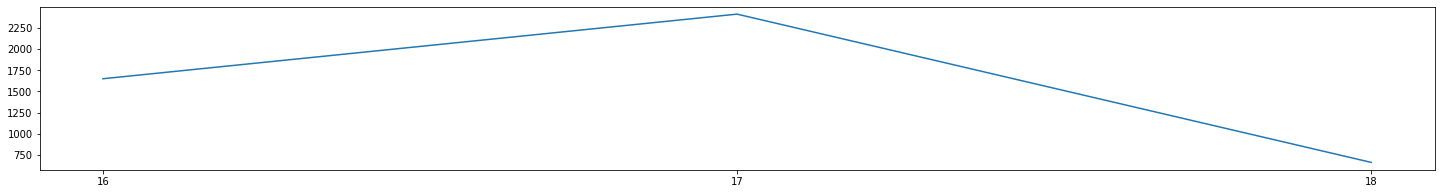

In [40]:
plt.figure(figsize=(25, 3))
plt.plot(hourly_df["hour"], hourly_df["total_donation"])

## Minute Average 

In [41]:
df["minute"] = df["created"].dt.strftime("%H-%M")
df

,name,team_name,created,amount,hour,minute
0,cuboids,Anonymous,2021-12-02 18:29:19,2,18,18-29
1,ips,Anonymous,2021-12-02 18:29:16,10,18,18-29
2,Bretondudgeon,Anonymous,2021-12-02 18:28:47,6,18,18-28
3,White Jesus*,**********,2021-12-02 18:27:58,1,18,18-27
4,Anonymous,Anonymous,2021-12-02 18:26:34,5,18,18-26
...,...,...,...,...,...,...
115,Anonymous,Anonymous,2021-12-02 16:23:48,5,16,16-23
116,Anonymous,Anonymous,2021-12-02 16:23:31,10,16,16-23
117,Lil Monki,Lil Monki,2021-12-02 16:22:40,110,16,16-22
118,SHJenkins,Anonymous,2021-12-02 16:20:28,2,16,16-20


In [42]:
minute_grp = df.groupby(df["minute"])["amount"].sum()
minute_grp

minute
16-18      5
16-20      2
16-22    110
16-23     15
16-24     40
        ... 
18-24     35
18-26     80
18-27      1
18-28      6
18-29     12
Name: amount, Length: 80, dtype: int64

In [43]:
minute_df = pandas.DataFrame({"minute": minute_grp.index, "total_donation": minute_grp.values})
minute_df

,minute,total_donation
0,16-18,5
1,16-20,2
2,16-22,110
3,16-23,15
4,16-24,40
...,...,...
75,18-24,35
76,18-26,80
77,18-27,1
78,18-28,6


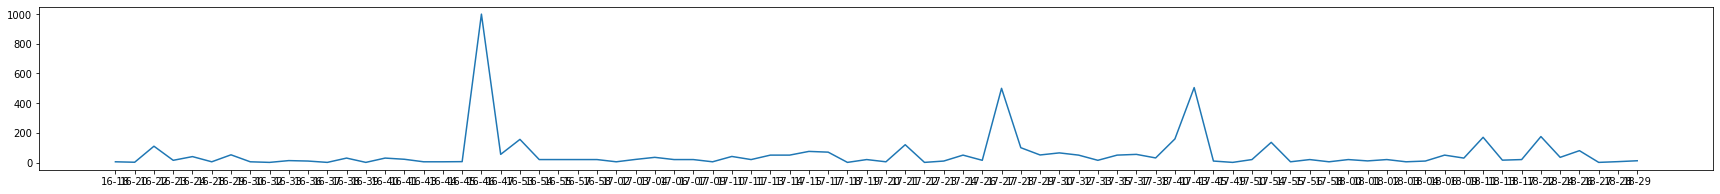

In [44]:
plt.figure(figsize=(30, 3))
plt.plot(minute_df["minute"], minute_df["total_donation"])

In [50]:
donations["most"]

[{'ff': 0,
  'name': 'Tobi Lütke',
  'team_name': '',
  'message_public': 'For the Lorax... but wet.',
  'flair': 'feed-icon-6.png',
  'pounds': '1,200,001',
  'pounds_color': 'FFB72B',
  'created_at': 1635781768,
  'is_gift': 0},
 {'ff': 0,
  'name': 'ERIK BERGMAN, GREAT.COM',
  'team_name': 'GREAT.COM',
  'message_public': 'THE UNCONVENTIONAL CHARITY PROJECT GREAT.COM AND @SMILINGERIK ARE MOVING MONEY FROM THE ONLINE CASINO INDUSTRY TO CLEAN UP 500+ TONNES OF TRASH.',
  'flair': 'feed-icon-6.png',
  'pounds': '1,200,000',
  'pounds_color': 'FFB72B',
  'created_at': 1635710296,
  'is_gift': 0},
 {'ff': 0,
  'name': 'Anonymous',
  'team_name': '',
  'message_public': 'BIG OR SMALL, WE CAN ALL MAKE A DIFFERENCE. #TEAMSEAS',
  'flair': 'feed-icon-6.png',
  'pounds': '1,000,000',
  'pounds_color': 'FFB72B',
  'created_at': 1636748929,
  'is_gift': 0},
 {'ff': 0,
  'name': 'The Bikoff Foundation',
  'team_name': '',
  'message_public': '',
  'flair': 'feed-icon-6.png',
  'pounds': '1,000,0

In [56]:
df_li = []
for mst in donations["most"]:
    d = {}
    d["name"] = mst["name"]
    d["amount"] = locale.atoi(mst["pounds"])
    d["created"] = datetime.strptime(datetime.utcfromtimestamp(int(mst["created_at"])).strftime('%Y-%m-%d %H:%M:%S'), '%Y-%m-%d %H:%M:%S')
    df_li.append(d)
df_li

[{'name': 'Tobi Lütke',
  'amount': 1200001,
  'created': datetime.datetime(2021, 11, 1, 15, 49, 28)},
 {'name': 'ERIK BERGMAN, GREAT.COM',
  'amount': 1200000,
  'created': datetime.datetime(2021, 10, 31, 19, 58, 16)},
 {'name': 'Anonymous',
  'amount': 1000000,
  'created': datetime.datetime(2021, 11, 12, 20, 28, 49)},
 {'name': 'The Bikoff Foundation',
  'amount': 1000000,
  'created': datetime.datetime(2021, 10, 31, 2, 7, 33)},
 {'name': 'Patreon',
  'amount': 500000,
  'created': datetime.datetime(2021, 11, 3, 1, 44, 23)},
 {'name': 'YouTube Originals',
  'amount': 400000,
  'created': datetime.datetime(2021, 10, 30, 2, 11, 52)},
 {'name': 'Susan Wojcicki',
  'amount': 350000,
  'created': datetime.datetime(2021, 11, 6, 18, 33, 29)},
 {'name': 'Sealow',
  'amount': 350000,
  'created': datetime.datetime(2021, 10, 30, 1, 22, 49)},
 {'name': 'Rapture',
  'amount': 231363,
  'created': datetime.datetime(2021, 11, 3, 1, 27, 11)},
 {'name': 'Dyar Al-Ashtari',
  'amount': 150000,
  'cre

In [58]:
df = pandas.DataFrame(df_li)
df

,name,amount,created
0,Tobi Lütke,1200001,2021-11-01 15:49:28
1,"ERIK BERGMAN, GREAT.COM",1200000,2021-10-31 19:58:16
2,Anonymous,1000000,2021-11-12 20:28:49
3,The Bikoff Foundation,1000000,2021-10-31 02:07:33
4,Patreon,500000,2021-11-03 01:44:23
...,...,...,...
115,SMii7Y,5000,2021-10-29 20:02:12
116,Sketch,5000,2021-10-29 20:01:00
117,Caylus,5000,2021-10-29 19:59:32
118,Anonymous,4994,2021-11-01 02:17:00


<BarContainer object of 120 artists>

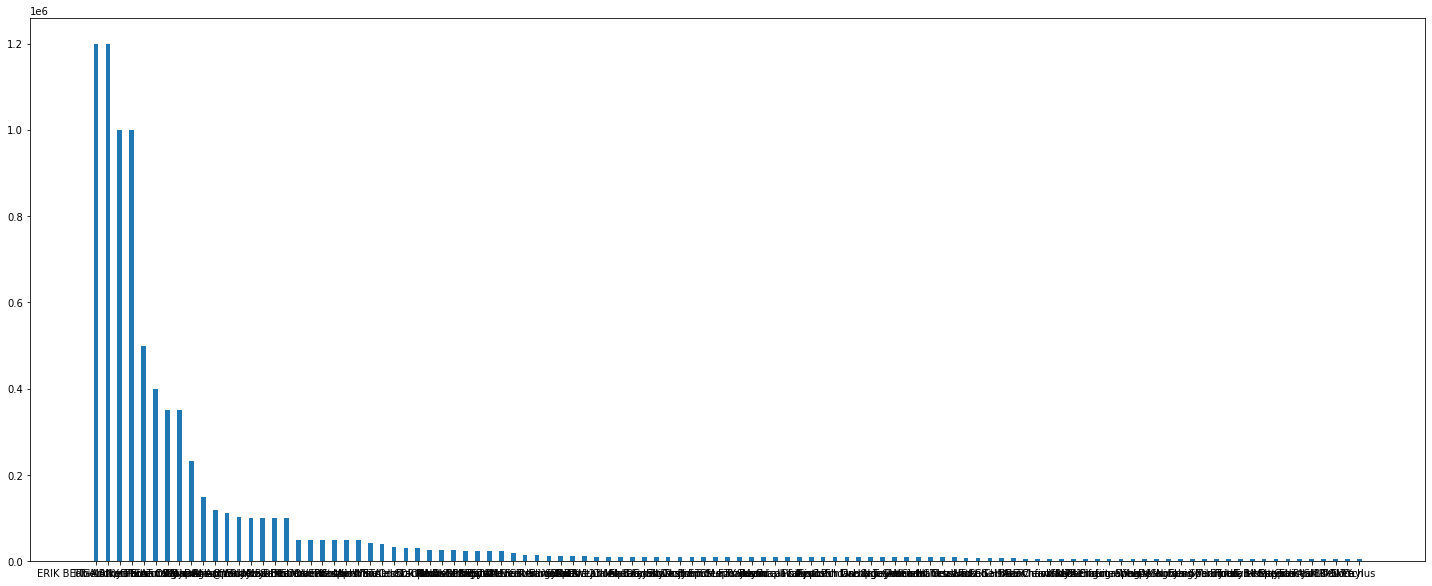

In [64]:
plt.figure(figsize=(25, 10))
plt.bar(df["name"], df["amount"], width=0.4)

In [65]:
date_sorted = df.sort_values(by=["created"])
date_sorted

,name,amount,created
15,Mark Rober,100010,2021-10-29 19:54:59
14,MrBeast,100011,2021-10-29 19:55:00
117,Caylus,5000,2021-10-29 19:59:32
116,Sketch,5000,2021-10-29 20:01:00
115,SMii7Y,5000,2021-10-29 20:02:12
...,...,...,...
52,Trove Brands,10000,2021-12-01 18:47:18
18,DISCOVERY,50150,2021-12-01 19:00:00
50,Danuki Dojo,10008,2021-12-02 01:36:28
33,Redbeet Interactive,25000,2021-12-02 15:42:46


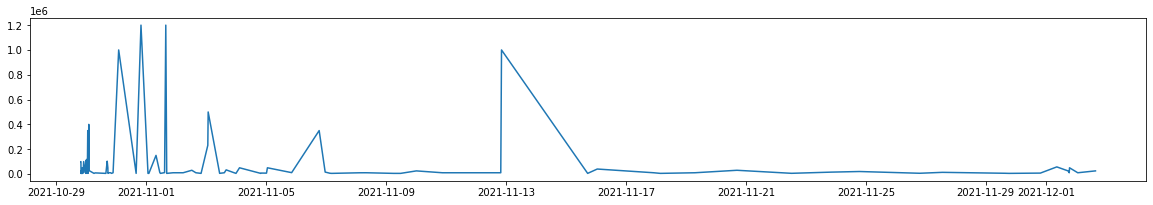

In [70]:
plt.figure(figsize=(20,3))
plt.plot(date_sorted["created"], date_sorted["amount"])

In [79]:
donations["teams_most_donations"]

[{'team': '',
  'total_donation': '11,128,547',
  'total_members': '186604',
  'sort_donation': '11128547'},
 {'team': 'YT_Total',
  'total_donation': '1,252,069',
  'total_members': '4',
  'sort_donation': '1252069'},
 {'team': 'GREAT.COM',
  'total_donation': '1,200,061',
  'total_members': '11',
  'sort_donation': '1200061'},
 {'team': 'MrBeast',
  'total_donation': '579,052',
  'total_members': '929',
  'sort_donation': '579052'},
 {'team': 'Creators',
  'total_donation': '500,081',
  'total_members': '9',
  'sort_donation': '500081'},
 {'team': '8ec52114',
  'total_donation': '231,363',
  'total_members': '1',
  'sort_donation': '231363'},
 {'team': 'Pear AS',
  'total_donation': '150,000',
  'total_members': '1',
  'sort_donation': '150000'},
 {'team': "Mark Rober's Team",
  'total_donation': '131,764',
  'total_members': '910',
  'sort_donation': '131764'},
 {'team': 'DOGS OF ELON (NFT)',
  'total_donation': '124,257',
  'total_members': '5',
  'sort_donation': '124257'},
 {'tea

In [83]:
df_li = []
for i in donations["teams_most_donations"]:
    d = {}
    if not i["team"]:
        d["team_name"] = "Anonymous"
    else:
        d["team_name"] = i["team"]
    d["donation"] = locale.atoi(i["total_donation"])
    d["members"] = int(i["total_members"])
    df_li.append(d)
df_li

[{'team_name': 'Anonymous', 'donation': 11128547, 'members': 186604},
 {'team_name': 'YT_Total', 'donation': 1252069, 'members': 4},
 {'team_name': 'GREAT.COM', 'donation': 1200061, 'members': 11},
 {'team_name': 'MrBeast', 'donation': 579052, 'members': 929},
 {'team_name': 'Creators', 'donation': 500081, 'members': 9},
 {'team_name': '8ec52114', 'donation': 231363, 'members': 1},
 {'team_name': 'Pear AS', 'donation': 150000, 'members': 1},
 {'team_name': "Mark Rober's Team", 'donation': 131764, 'members': 910},
 {'team_name': 'DOGS OF ELON (NFT)', 'donation': 124257, 'members': 5},
 {'team_name': 'Prianna', 'donation': 100242, 'members': 14},
 {'team_name': 'Royal Caribbean', 'donation': 100175, 'members': 7},
 {'team_name': 'BIG Games', 'donation': 75161, 'members': 10},
 {'team_name': '#markrober', 'donation': 70529, 'members': 2354},
 {'team_name': 'CATFACE', 'donation': 50406, 'members': 13},
 {'team_name': '@SharkWeek', 'donation': 50150, 'members': 1},
 {'team_name': 'OGUsers',

In [84]:
df = pandas.DataFrame(df_li)
df

,team_name,donation,members
0,Anonymous,11128547,186604
1,YT_Total,1252069,4
2,GREAT.COM,1200061,11
3,MrBeast,579052,929
4,Creators,500081,9
5,8ec52114,231363,1
6,Pear AS,150000,1
7,Mark Rober's Team,131764,910
8,DOGS OF ELON (NFT),124257,5
9,Prianna,100242,14


In [95]:
df["avg"] = df["donation"]/df["members"]
df

,team_name,donation,members,avg
0,Anonymous,11128547,186604,59.637237
1,YT_Total,1252069,4,313017.250000
2,GREAT.COM,1200061,11,109096.454545
3,MrBeast,579052,929,623.306781
4,Creators,500081,9,55564.555556
5,8ec52114,231363,1,231363.000000
6,Pear AS,150000,1,150000.000000
7,Mark Rober's Team,131764,910,144.795604
8,DOGS OF ELON (NFT),124257,5,24851.400000
9,Prianna,100242,14,7160.142857


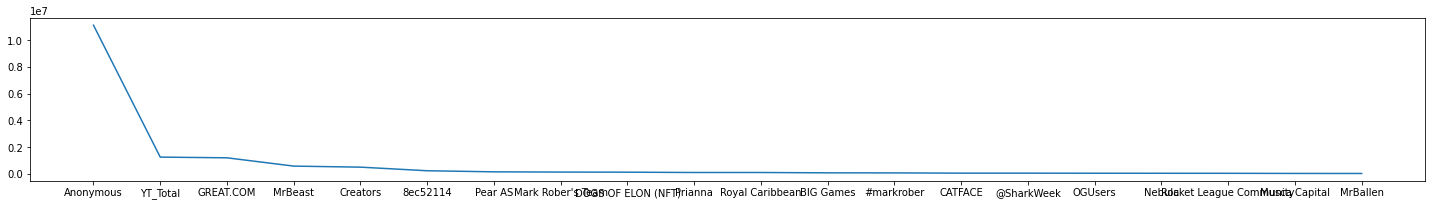

In [97]:
plt.figure(figsize=(25, 3))
plt.plot(df["team_name"], df["donation"])

In [96]:
df.sort_values(by=["avg"], ascending=False)

,team_name,donation,members,avg
1,YT_Total,1252069,4,313017.250000
5,8ec52114,231363,1,231363.000000
6,Pear AS,150000,1,150000.000000
2,GREAT.COM,1200061,11,109096.454545
4,Creators,500081,9,55564.555556
14,@SharkWeek,50150,1,50150.000000
18,Musca Capital,30069,1,30069.000000
8,DOGS OF ELON (NFT),124257,5,24851.400000
10,Royal Caribbean,100175,7,14310.714286
17,Rocket League Community,40011,4,10002.750000


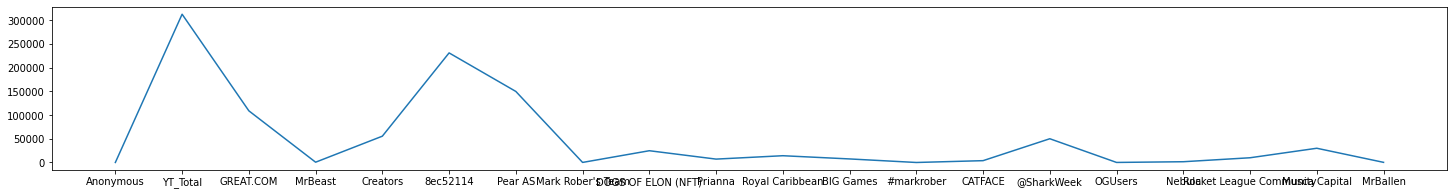

In [98]:
plt.figure(figsize=(25, 3))
plt.plot(df["team_name"], df["avg"])